In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("E:/SLIIT/3RD YEAR 2ND SEM/Fundamentals of Data Mining/GIT-FDM/Nethmi/NEW_preprocessed_data.csv")

In [3]:
df.drop(df.index[df['baths'] == 0.0], inplace = True)

In [4]:
df.drop(df.index[df['beds'] == 0], inplace = True)

In [5]:
df['pets_allowed'].value_counts()

1    86576
0    25275
Name: pets_allowed, dtype: int64

In [6]:
# using np.ceil to round to
df['baths'] = df['baths'].apply(np.ceil)

In [7]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state']]  # Features
y=df['pets_allowed']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(83888, 11)
(83888,)
(27963, 11)
(27963,)


In [9]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()


#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

# predictions
y_pred = rfc.predict(X_test)

In [10]:
from sklearn.model_selection import StratifiedKFold

In [11]:
skf = StratifiedKFold(n_splits=20)

In [12]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8934306047276759


In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
#confusion matrix creation

LABELS = ['0', '1']

conf_matrix = confusion_matrix(y_test, y_pred)

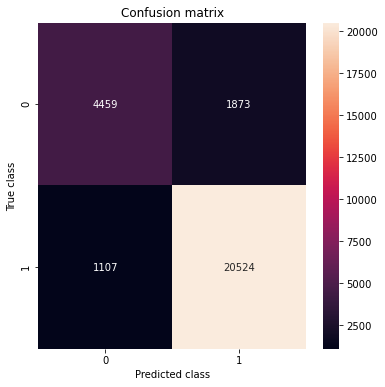

In [15]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of smoking allowed')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()